In [19]:
import pandas as pd

# ここにあなたのExcelファイルのパスを指定してください
# 例: file_path = 'C:/Users/YourName/Documents/SSDSE/SSDSE-A_municipalities.xlsx'
file_path = '/Users/kanaha/statistics/SSDSE-D-2023.xlsx'

# ExcelファイルをDataFrameとして読み込む
# シート名が 'Sheet1' でない場合は、'sheet_name' を適宜変更してください
df = pd.read_excel(file_path)

# データの最初の5行を表示して、正しく読み込めたか確認
print(df.head())

  SSDSE-D-2023   2021年 Prefecture         MA00           MB00  MB01 MB011  \
0         男女の別   地域コード       都道府県  推定人口（10歳以上）  学習・自己啓発・訓練の総数   外国語    英語   
1         0_総数  R00000         全国       112462           39.6  14.1  12.8   
2         0_総数  R01000        北海道         4614             35  11.1   9.9   
3         0_総数  R02000        青森県         1090           25.4   7.4   6.6   
4         0_総数  R03000        岩手県         1075           28.9   7.7   7.1   

      MB012             MB02        MB021  ... MG20   MG51 MG52 MG53  \
0  英語以外の外国語  商業実務・ビジネス関係(総数)  パソコンなどの情報処理  ...  その他  通勤・通学   仕事   学業   
1       4.2             20.1         16.5  ...   16     79  340  393   
2       3.3               17         14.1  ...   15     64  343  391   
3         2             12.7         10.3  ...   12     61  370  423   
4       2.4             12.8         10.3  ...   17     63  362  472   

       MH01      MH02      MH03      MH04      MH51       MH52  
0        起床      朝食開始      夕食開始        

In [20]:
#欠損値の確認
print(df.isnull().sum())

SSDSE-D-2023    0
2021年           0
Prefecture      0
MA00            0
MB00            0
               ..
MH02            0
MH03            0
MH04            0
MH51            0
MH52            0
Length: 124, dtype: int64


In [26]:
# Excelファイルを読み込む際に、ヘッダーを2行目（インデックス1）にする場合
# （Excelの1行目がインデックス0、2行目がインデックス1となるため）
df = pd.read_excel(file_path, header=1)
#２列目を削除する
df = df.drop(df.columns[1], axis=1)

# この場合、読み込んだデータフレームの最初の列が「男女の別」になるはずです。
# その上で「SSDSE-D-2023」という列がまだ残っている場合に、上記の drop() を実行します。
print(df.head())

   男女の別 都道府県  推定人口（10歳以上）  学習・自己啓発・訓練の総数   外国語    英語  英語以外の外国語  \
0  0_総数   全国       112462           39.6  14.1  12.8       4.2   
1  0_総数  北海道         4614           35.0  11.1   9.9       3.3   
2  0_総数  青森県         1090           25.4   7.4   6.6       2.0   
3  0_総数  岩手県         1075           28.9   7.7   7.1       2.4   
4  0_総数  宮城県         2065           37.5  12.4  10.9       4.0   

   商業実務・ビジネス関係(総数)  パソコンなどの情報処理  商業実務・ビジネス関係  ...  その他.4  通勤・通学.1  仕事.1  学業.1  \
0             20.1         16.5          8.5  ...     16       79   340   393   
1             17.0         14.1          6.7  ...     15       64   343   391   
2             12.7         10.3          5.2  ...     12       61   370   423   
3             12.8         10.3          5.4  ...     17       63   362   472   
4             18.9         16.0          7.4  ...     16       73   352   395   

         起床      朝食開始      夕食開始        就寝        出勤  仕事からの帰宅時間  
0  06:38:00  07:11:00  18:58:00  23:04:00  08:20:00

In [30]:
filtered_df = df[(df['男女の別'] == '1_男') & (df['都道府県'] == '全国')]
filtered_df2= df[(df['男女の別'] == '2_女') & (df['都道府県'] == '全国')]
print(filtered_df, filtered_df2)

   男女の別 都道府県  推定人口（10歳以上）  学習・自己啓発・訓練の総数   外国語    英語  英語以外の外国語  \
48  1_男   全国        54829           39.8  14.3  13.5       3.5   

    商業実務・ビジネス関係(総数)  パソコンなどの情報処理  商業実務・ビジネス関係  ...  その他.4  通勤・通学.1  仕事.1  \
48             25.0         20.1         11.5  ...     15       84   387   

    学業.1        起床      朝食開始      夕食開始        就寝        出勤  仕事からの帰宅時間  
48   383  06:43:00  07:05:00  19:07:00  23:06:00  08:02:00   19:08:00  

[1 rows x 123 columns]    男女の別 都道府県  推定人口（10歳以上）  学習・自己啓発・訓練の総数   外国語    英語  英語以外の外国語  \
96  2_女   全国        57633           39.5  13.9  12.2       4.8   

    商業実務・ビジネス関係(総数)  パソコンなどの情報処理  商業実務・ビジネス関係  ...  その他.4  通勤・通学.1  仕事.1  \
96             15.5         13.0          5.6  ...     17       71   282   

    学業.1        起床      朝食開始      夕食開始        就寝        出勤  仕事からの帰宅時間  
96   404  06:33:00  07:17:00  18:49:00  23:02:00  08:44:00   17:47:00  

[1 rows x 123 columns]


抽出された全国の男女別データ:
  男女の別 都道府県  推定人口（10歳以上）  学習・自己啓発・訓練の総数   外国語    英語  英語以外の外国語  \
2  1_男   全国        54829           39.8  14.3  13.5       3.5   
4  2_女   全国        57633           39.5  13.9  12.2       4.8   

   商業実務・ビジネス関係(総数)  パソコンなどの情報処理        起床  
2             25.0         20.1  06:43:00  
4             15.5         13.0  06:33:00  
------------------------------


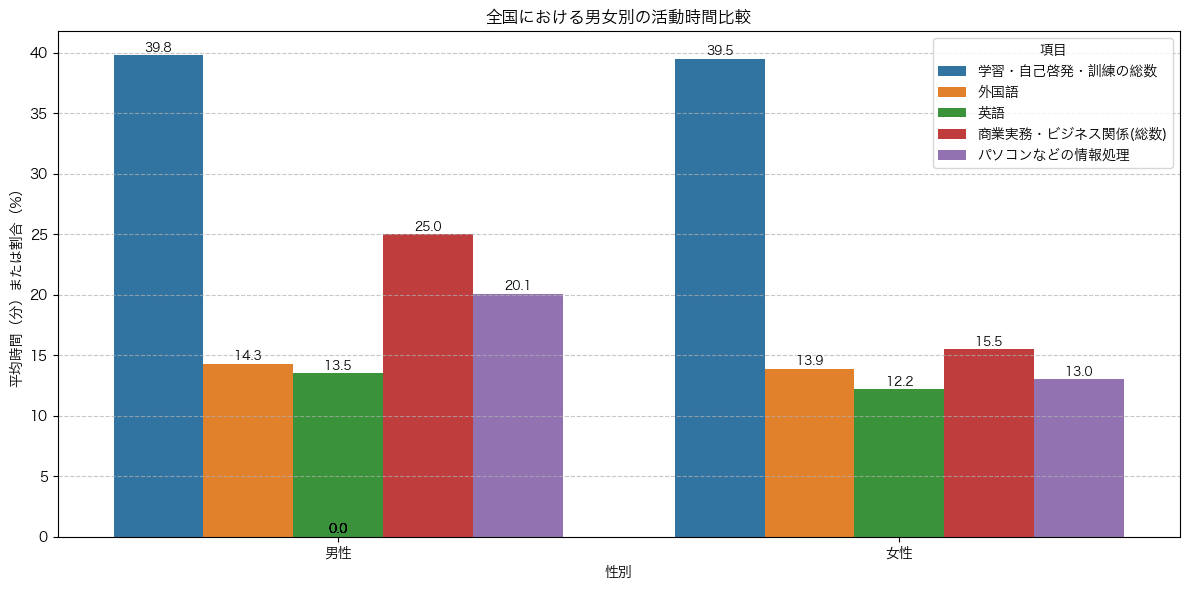

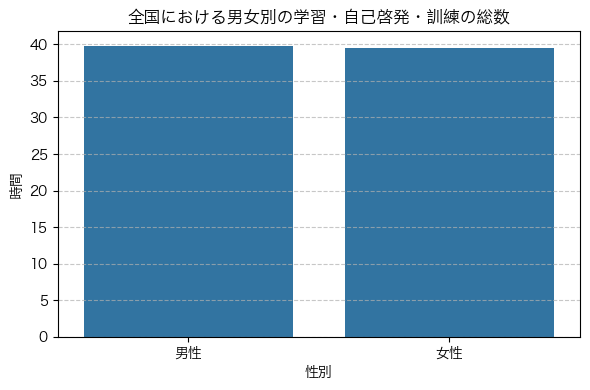

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 日本語表示のためのフォント設定（VS CodeのJupyter Notebookでも有効）
# ご自身のOSに合わせて適切なフォントを指定してください
# plt.rcParams['font.family'] = 'Meiryo' # Windowsの場合
plt.rcParams['font.family'] = 'Hiragino Sans GB' # Macの場合
plt.rcParams['axes.unicode_minus'] = False # マイナス記号を正しく表示するため

# ----------------------------------------------------
# ここから、あなたの実際のデータフレームを読み込む部分です。
# 例としてダミーデータを作成しますが、あなたはここを実際の読み込みコードに置き換えてください。
# df = pd.read_excel(file_path, sheet_name='SSDSE-D-2023.xlsx')
# そして、もし最初の数行がヘッダー説明であれば、header=1 などの引数を検討してください。
# また、以前の質問で削除した 'SSDSE-D-2023' 列は、このコードでは存在しない前提で進めます。
# ----------------------------------------------------

# ダミーデータ（あなたの実際のデータ構造に合わせてください）
data = {
    '男女の別': ['0_総数', '0_総数', '1_男', '1_男', '2_女', '2_女'],
    '都道府県': ['全国', '北海道', '全国', '東京都', '全国', '大阪府'],
    '推定人口（10歳以上）': [112462, 4614, 54829, 6000, 57633, 7000],
    '学習・自己啓発・訓練の総数': [39.6, 35.0, 39.8, 42.0, 39.5, 38.0],
    '外国語': [14.1, 11.1, 14.3, 16.0, 13.9, 12.5],
    '英語': [12.8, 9.9, 13.5, 14.8, 12.2, 11.0],
    '英語以外の外国語': [4.2, 3.3, 3.5, 4.0, 4.8, 4.0],
    '商業実務・ビジネス関係(総数)': [20.0, 18.0, 25.0, 28.0, 15.5, 14.0],
    'パソコンなどの情報処理': [15.0, 13.0, 20.1, 22.0, 13.0, 11.5],
    # 他の列も実際には含まれるはずですが、ここでは省略
    '起床': ['06:40:00', '06:30:00', '06:43:00', '06:35:00', '06:33:00', '06:25:00']
}
df = pd.DataFrame(data)

# ----------------------------------------------------
# ここまでがダミーデータの作成です。
# 実際のデータフレーム df を使用して、以下の処理を進めてください。
# ----------------------------------------------------

# 1. 「全国」の男女データを抽出する
# '男女の別' が '1_男' または '2_女' で、かつ '都道府県' が '全国' の行を抽出します。
df_gender_national = df[
    ((df['男女の別'] == '1_男') | (df['男女の別'] == '2_女')) &
    (df['都道府県'] == '全国')
]

# 抽出されたデータを確認
print("抽出された全国の男女別データ:")
print(df_gender_national)
print("-" * 30)

# 2. 可視化したい項目をリストで指定する
# 例として3つの項目を選びましたが、ここに追加したり変更したりできます。
comparison_items = [
    '学習・自己啓発・訓練の総数',
    '外国語',
    '英語',
    '商業実務・ビジネス関係(総数)', # 追加したい項目があればここに追加
    'パソコンなどの情報処理'          # 追加したい項目があればここに追加
]

# 3. 各項目について男女を比較して棒グラフで可視化する
# グラフのサイズを調整して見やすくします
plt.figure(figsize=(12, 6))

# 棒グラフの作成
# x軸に項目名、y軸に値、hueで男女を色分けします
sns.barplot(x='男女の別', y='value', hue='variable', data=df_gender_national.melt(id_vars=['男女の別', '都道府県'], value_vars=comparison_items))

# 各棒の上に数値を表示
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5),
                       textcoords='offset points', fontsize=9)

plt.title('全国における男女別の活動時間比較')
plt.xlabel('性別')
plt.ylabel('平均時間（分）または割合（%）') # 項目によって単位が異なる可能性があるので適宜変更
plt.xticks(ticks=[0, 1], labels=['男性', '女性']) # 1_男と2_女を「男性」「女性」に表示
plt.legend(title='項目')
plt.grid(axis='y', linestyle='--', alpha=0.7) # 横のグリッド線を追加
plt.tight_layout() # レイアウトを調整
plt.show()

# 個別の項目で棒グラフを作成することもできます（より詳細な分析向け）
# 例えば、「学習・自己啓発・訓練の総数」だけを比較
plt.figure(figsize=(6, 4))
sns.barplot(x='男女の別', y='学習・自己啓発・訓練の総数', data=df_gender_national)
plt.title('全国における男女別の学習・自己啓発・訓練の総数')
plt.xlabel('性別')
plt.ylabel('時間')
plt.xticks(ticks=[0, 1], labels=['男性', '女性'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()